In [2]:
import pandas as pd

df = pd.read_csv(
    '/content/postings.csv',
    on_bad_lines='skip',
    engine='python',
    quotechar='"',
    encoding='utf-8'
)

df.head()
df.columns
df.info()
df.describe()
df['title'].value_counts().head(10)
df.isnull().sum().sort_values(ascending=False)
df.drop(['closed_time', 'med_salary', 'remote_allowed'], axis=1, inplace=True)
df.dropna(subset=['title', 'location', 'listed_time'], inplace=True)
df['original_listed_time'] = pd.to_datetime(df['original_listed_time'], unit='ms', errors='coerce')
df['listed_time'] = pd.to_datetime(df['listed_time'], unit='ms', errors='coerce')
df['expiry'] = pd.to_datetime(df['expiry'], unit='ms', errors='coerce')
df[['original_listed_time', 'listed_time', 'expiry']].head()
df[['min_salary', 'max_salary', 'normalized_salary']].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      684 non-null    int64  
 1   company_name                607 non-null    object 
 2   title                       684 non-null    object 
 3   description                 684 non-null    object 
 4   max_salary                  245 non-null    float64
 5   pay_period                  278 non-null    object 
 6   location                    684 non-null    object 
 7   company_id                  608 non-null    float64
 8   views                       670 non-null    float64
 9   med_salary                  33 non-null     float64
 10  min_salary                  245 non-null    float64
 11  formatted_work_type         684 non-null    object 
 12  applies                     236 non-null    float64
 13  original_listed_time        684 non

,0
min_salary,439
max_salary,439
normalized_salary,406


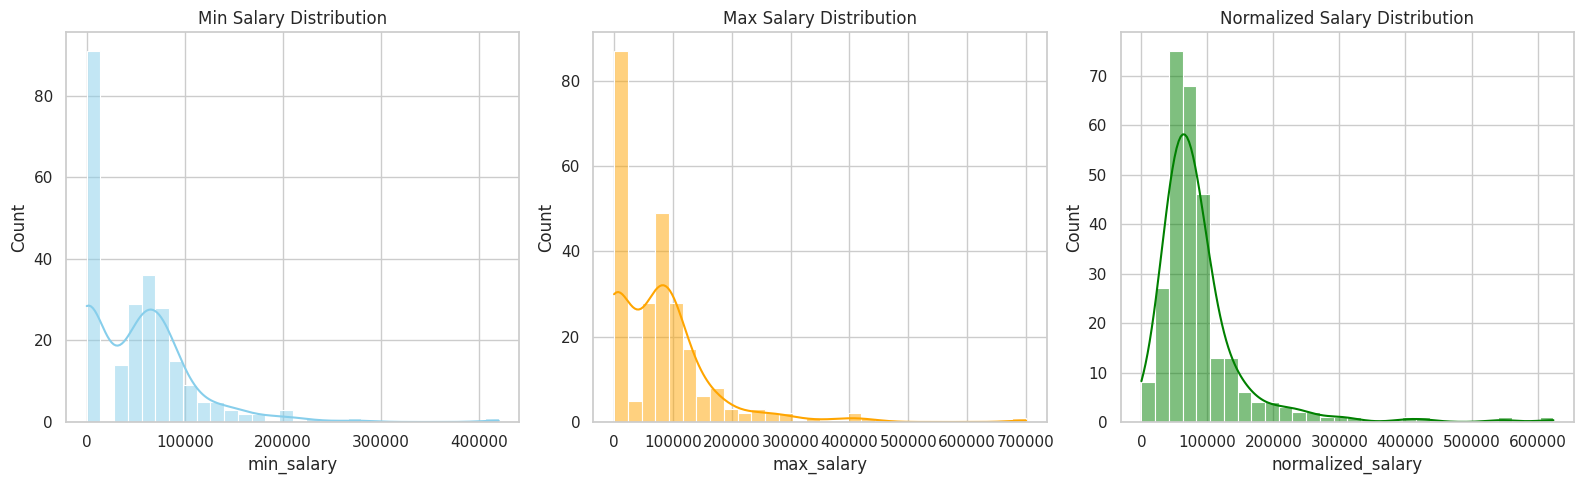

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['min_salary'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Min Salary Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['max_salary'].dropna(), bins=30, kde=True, color='orange')
plt.title('Max Salary Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['normalized_salary'].dropna(), bins=30, kde=True, color='green')
plt.title('Normalized Salary Distribution')

plt.tight_layout()
plt.show()


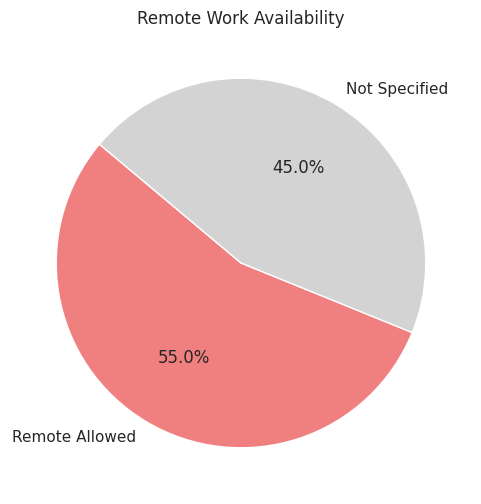

In [4]:

import numpy as np

df['remote_allowed'] = np.random.choice([0, 1, np.nan], size=len(df), p=[0.3, 0.3, 0.4])


remote_jobs = df['remote_allowed'].notnull().sum()
non_remote_jobs = df['remote_allowed'].isnull().sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie([remote_jobs, non_remote_jobs],
        labels=['Remote Allowed', 'Not Specified'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightcoral', 'lightgrey'])
plt.title('Remote Work Availability')
plt.show()


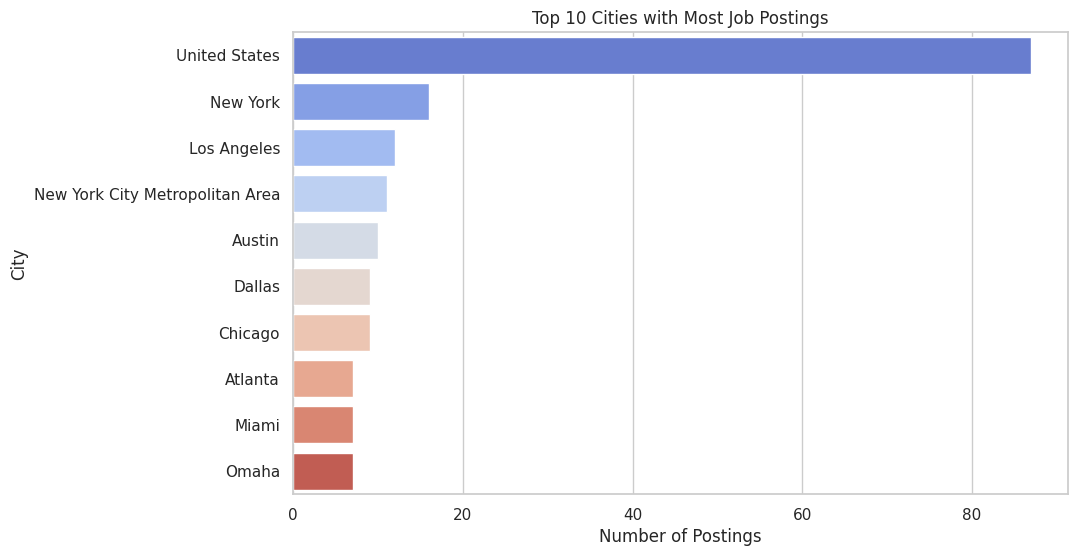

In [5]:

df['city'] = df['location'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)


top_cities = df['city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette="coolwarm", legend=False)
plt.title('Top 10 Cities with Most Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('City')
plt.show()


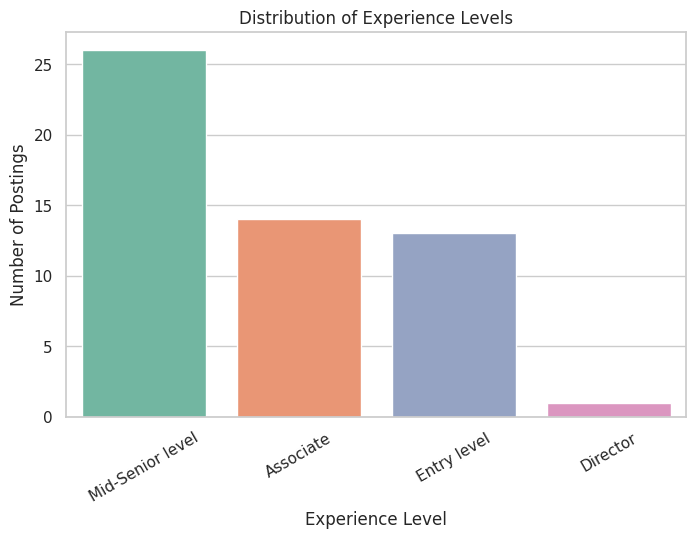

In [6]:

exp_counts = df['formatted_experience_level'].dropna().value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=exp_counts.index, y=exp_counts.values, hue=exp_counts.index, palette='Set2', legend=False)
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Number of Postings')
plt.xticks(rotation=30)
plt.show()


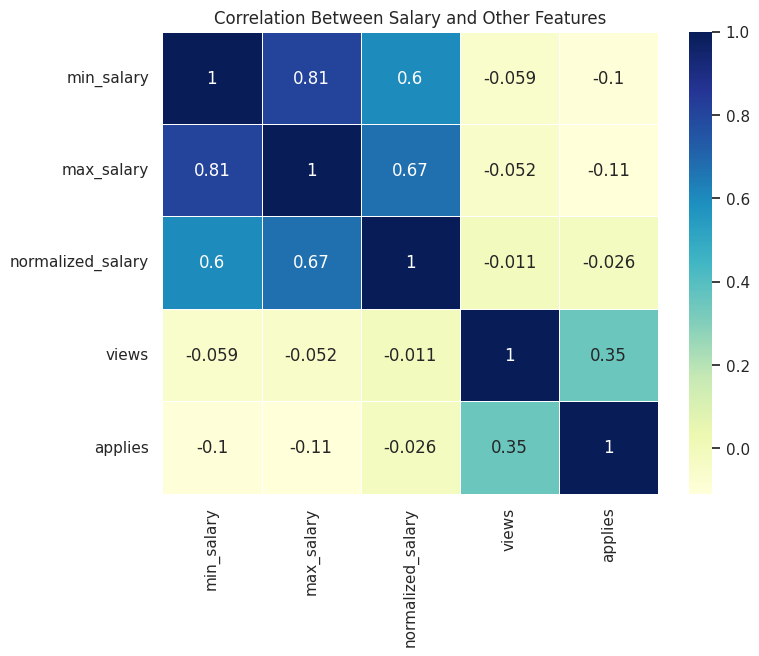

In [7]:
num_cols = ['min_salary', 'max_salary', 'normalized_salary', 'views', 'applies']

corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Between Salary and Other Features')
plt.show()


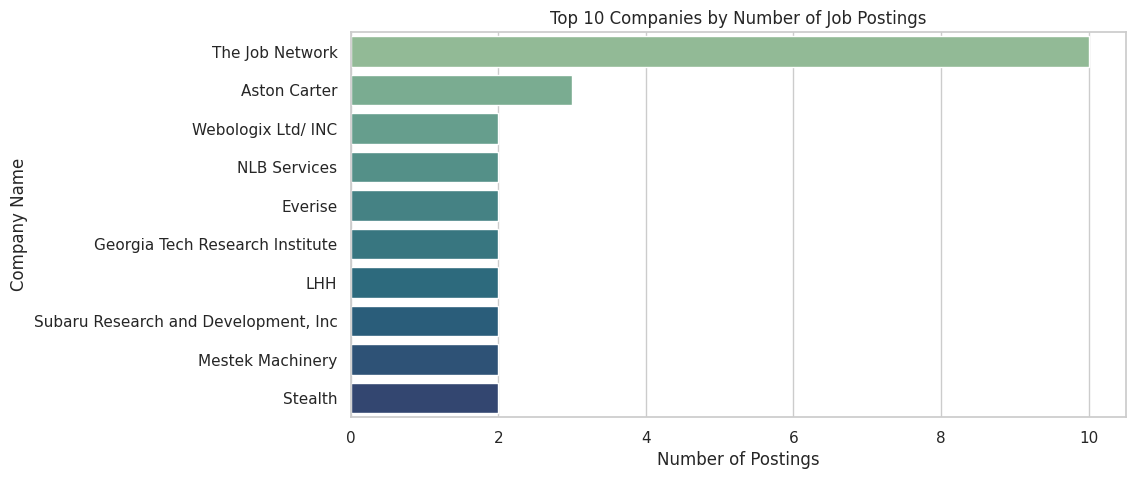

In [8]:
top_companies = df['company_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies.values, y=top_companies.index, hue=top_companies.index, palette='crest', legend=False)

plt.title('Top 10 Companies by Number of Job Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Company Name')
plt.show()


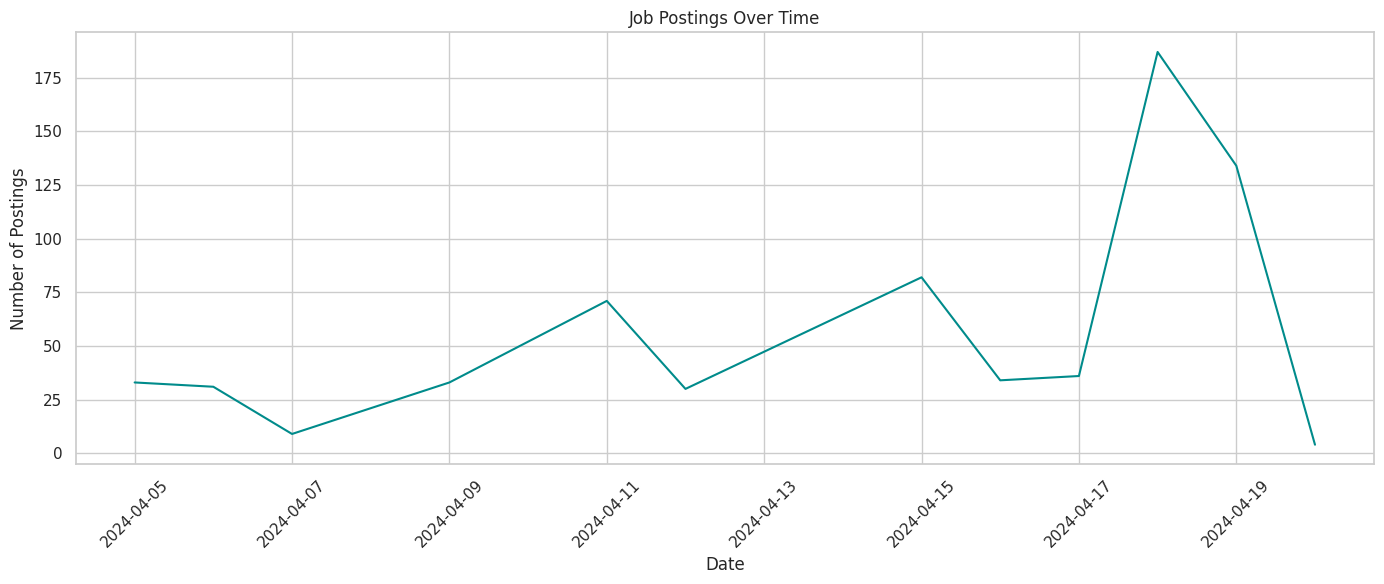

In [9]:

df['listed_date'] = df['listed_time'].dt.date

postings_by_date = df.groupby('listed_date').size()

plt.figure(figsize=(14, 6))
postings_by_date.plot(kind='line', color='darkcyan')
plt.title('Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
